<a href="https://colab.research.google.com/github/sadhna77/dataset_python/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
url = 'https://github.com/sadhna77/dataset_python/raw/refs/heads/main/16k_Movies.csv.zip'

df = pd.read_csv(url)



In [8]:
# Drop the 'Unnamed: 0' column as it is not useful
df.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
df.describe()

,Rating
count,12846.000000
mean,6.617632
std,1.415272
min,0.300000
25%,5.800000
50%,6.800000
75%,7.600000
max,10.000000


In [6]:
# Convert 'Release Date' to datetime format
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')
print(df['Release Date'].head())


0   1996-03-22
1   1994-11-23
2   1970-10-22
3   1972-03-13
4   2004-08-13
Name: Release Date, dtype: datetime64[ns]


In [ ]:
# Convert 'No of Persons Voted' to numeric, coercing errors
df['No of Persons Voted'] = pd.to_numeric(df['No of Persons Voted'].str.replace(',', ''), errors='coerce')



AttributeError: Can only use .str accessor with string values!

In [ ]:
print(df['No of Persons Voted'].dtype)  # Check the data type
print(df['No of Persons Voted'].head())  # View first few rows


float64
0    118.0
1    241.0
2    106.0
3    147.0
4     85.0
Name: No of Persons Voted, dtype: float64


In [ ]:
# Convert 'Duration' to numeric (assuming duration is in minutes)
# df['Duration'] = pd.to_numeric(df['Duration'].str.replace(' min', ''), errors='coerce')

In [ ]:
print(df['Duration'].head(30))  # View the first few rows
print(df['Duration'].dtype)   # Check the data type (should be numeric)


0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
24   NaN
25   NaN
26   NaN
27   NaN
28   NaN
29   NaN
Name: Duration, dtype: float64
float64


In [ ]:
# Summary statistics of the dataset
df.describe()


,Release Date,Rating,No of Persons Voted,Duration
count,16290,12846.000000,12829.000000,0.0
mean,2008-08-13 01:23:00.331491584,6.617632,134.856419,NaN
min,1970-01-25 00:00:00,0.300000,4.000000,NaN
25%,2002-08-14 06:00:00,5.800000,11.000000,NaN
50%,2011-03-11 00:00:00,6.800000,31.000000,NaN
75%,2017-07-07 00:00:00,7.600000,116.000000,NaN
max,2024-11-13 00:00:00,10.000000,10639.000000,NaN
std,NaN,1.415272,366.079345,NaN


In [10]:
# importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

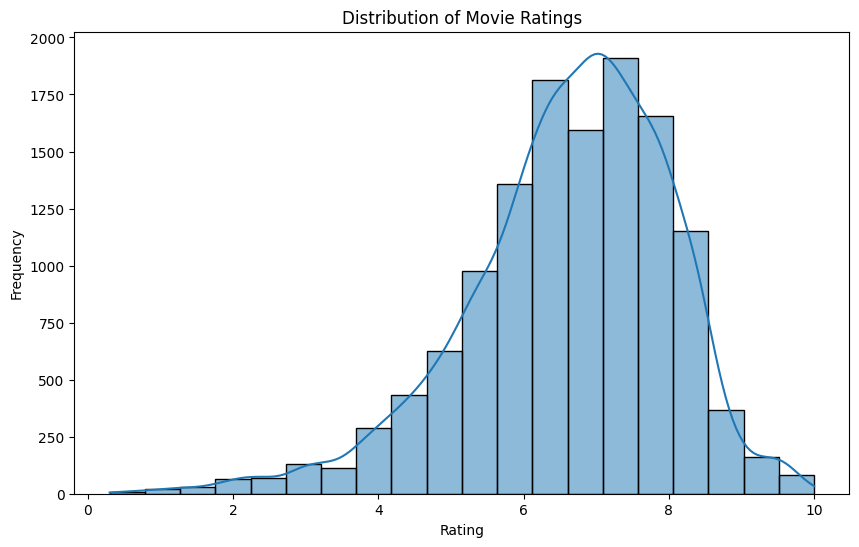

In [11]:
# Distribution of movie ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'].dropna(), bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Convert 'Release Date' to datetime
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')

# Extract the year
df['Year'] = df['Release Date'].dt.year


# Number of movies released per year
df['Year'] = df['Release Date'].dt.year
movies_per_year = df['Year'].value_counts().sort_index()



In [ ]:
df['Release Date'].isna().sum()  # Counts the number of invalid/missing dates


0

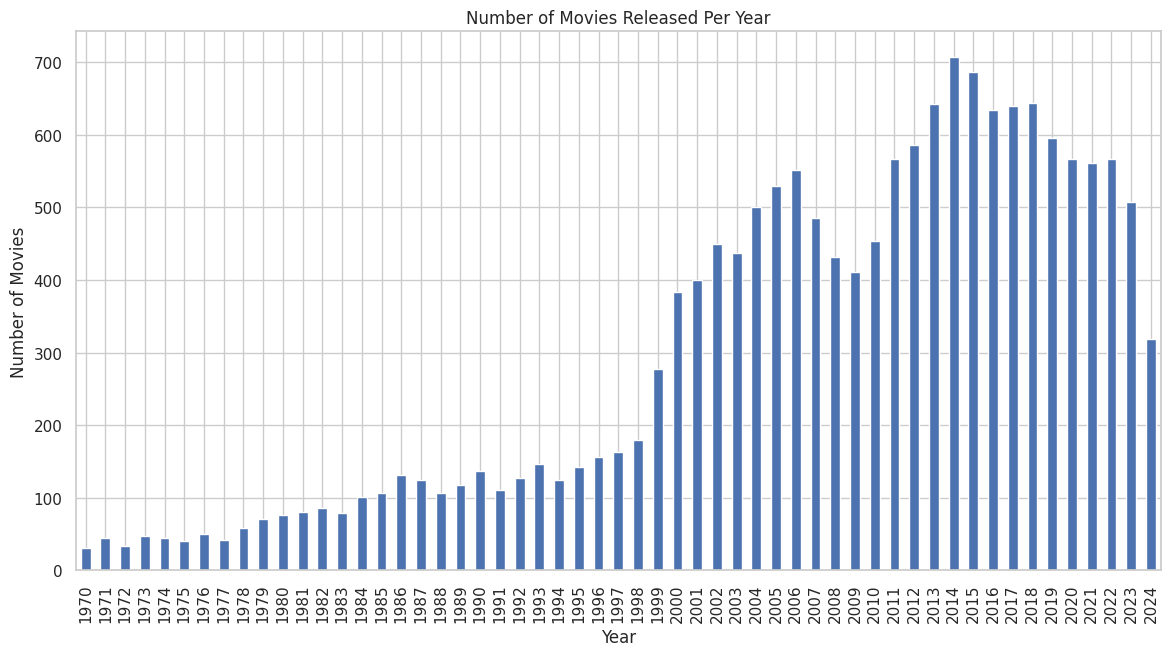

In [ ]:
plt.figure(figsize=(14, 7))
movies_per_year.plot(kind='bar')
plt.title('Number of Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

In [ ]:
# Count occurrences of each genre
genre_counts = df['Genres'].value_counts()

# Get the top 10 genres
top_genres = genre_counts.nlargest(10)

# Display the top 10 genres
print(top_genres)


Genres
Drama                           1521
Documentary                     1018
Comedy,Drama                     788
Comedy,Drama,Romance             644
Drama,Romance                    575
Comedy                           465
Comedy,Romance                   387
Crime,Drama,Thriller             293
Drama,Thriller                   245
Crime,Drama,Mystery,Thriller     197
Name: count, dtype: int64


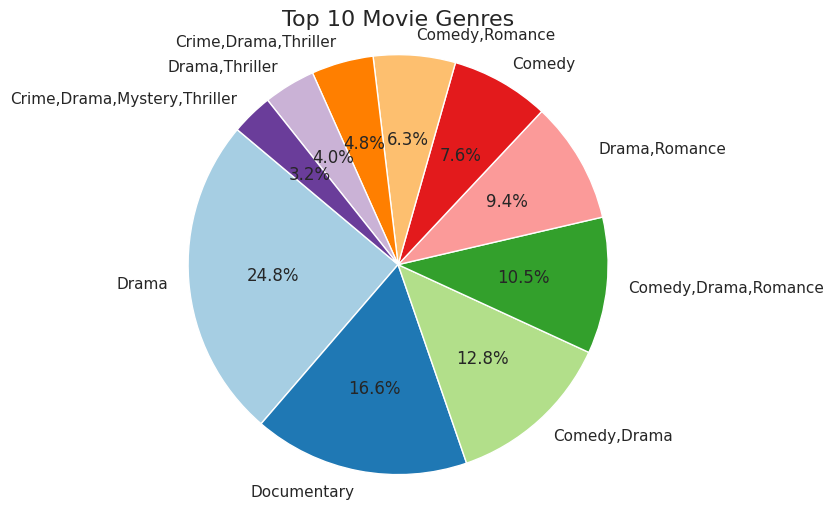

In [ ]:
# Count occurrences of each genre
genre_counts = df['Genres'].value_counts()
top_genres = genre_counts.nlargest(10)

plt.figure(figsize=(10, 6))
plt.pie(top_genres, labels=top_genres.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 10 Movie Genres', fontsize=16)
plt.axis('equal')
plt.show()

In [ ]:
# https://www.kaggle.com/code/devraai/analyzing-movie-ratings-over-a-century
!ls

drive  sample_data


In [ ]:
# Check for missing values in the Rating column
print(df['Rating'].isna().sum())

# Remove rows with missing ratings (if any)
df = df.dropna(subset=['Rating'])


3444


In [ ]:
# Drop rows with missing ratings
df = df.dropna(subset=['Rating'])

# Sort by Rating and get the top 10 movies
most_rated_movies = df.sort_values(by='Rating', ascending=False).head(25)

# Preview the selected movies
most_rated_movies[['Title', 'Rating']]


,Title,Rating
15958,Turk 182,10.0
15537,Surviving Eden,10.0
15299,A Hole in My Heart,10.0
10076,Bad Behaviour,9.9
15515,After,9.9
7451,Cora Bora,9.9
15514,After,9.9
15513,After,9.9
15512,After,9.9
15320,Don't Tempt Me,9.8


In [ ]:
df = df.dropna(subset=['Rating'])

# Specify the genre you want to filter by (e.g., "Action")
selected_genre = 'Documentary'  # Change this to your desired genre
genre_movies = df[df['Genres'].str.contains(selected_genre, case=False, na=False)]

# Filter for high-rated movies (e.g., ratings above 7)
high_rated_genre_movies = genre_movies[genre_movies['Rating'] > 8.9]


In [ ]:
# Create a DataFrame for the table and sort by rating in descending order
high_rated_movies_table = high_rated_genre_movies[['Title', 'Rating']].sort_values(by='Rating', ascending=False).reset_index(drop=True)

# Display the table
print(high_rated_movies_table)

                                              Title  Rating
0                                        Boxing Gym     9.8
1                                   Kings of Pastry     9.8
2                                           Neshoba     9.8
3                                         Free Time     9.7
4                                     Ahead of Time     9.6
5                                          The Grab     9.6
6            The Gospel According to Philip K. Dick     9.5
7                              The Turandot Project     9.5
8                                    Berlin Babylon     9.5
9               Casuistry: The Art of Killing a Cat     9.5
10                                       2nd Chance     9.5
11                                   Gerrymandering     9.5
12                                         Farmland     9.5
13                     Matthew Barney: No Restraint     9.5
14                           Joan Baez I Am A Noise     9.4
15                                Crazy,

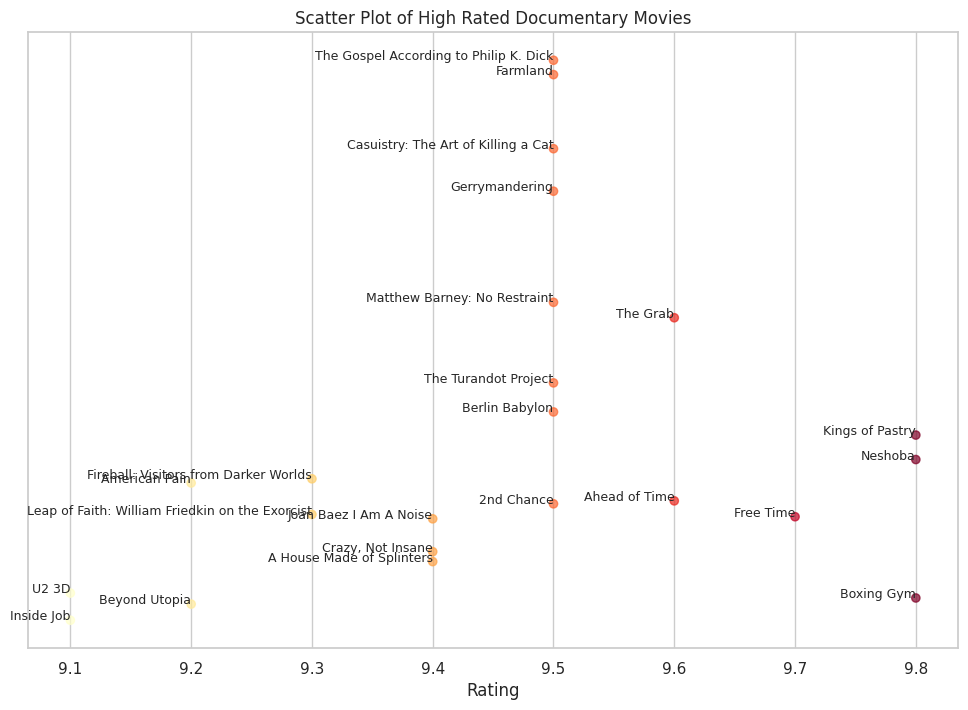

In [ ]:
# Set the visual style
sns.set(style='whitegrid')

# Create a color map from yellow to red
norm = plt.Normalize(high_rated_genre_movies['Rating'].min(), high_rated_genre_movies['Rating'].max())
colors = plt.cm.YlOrRd(norm(high_rated_genre_movies['Rating']))

# Create the scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(x=high_rated_genre_movies['Rating'], y=high_rated_genre_movies.index, color=colors, alpha=0.7)

# Annotate each point with the movie title
for i, row in high_rated_genre_movies.iterrows():
    plt.text(row['Rating'], row.name, row['Title'], fontsize=9, ha='right')

# Set titles and labels
plt.title(f'Scatter Plot of High Rated {selected_genre} Movies')
plt.xlabel('Rating')
plt.yticks([])  # Remove y-ticks for a cleaner look

# Show the plot
plt.show()

In [ ]:
# Remove commas, fill NaN with 0, and convert to integer
df['No of Persons Voted'] = df['No of Persons Voted'].str.replace(',', '').fillna(0).astype(int)


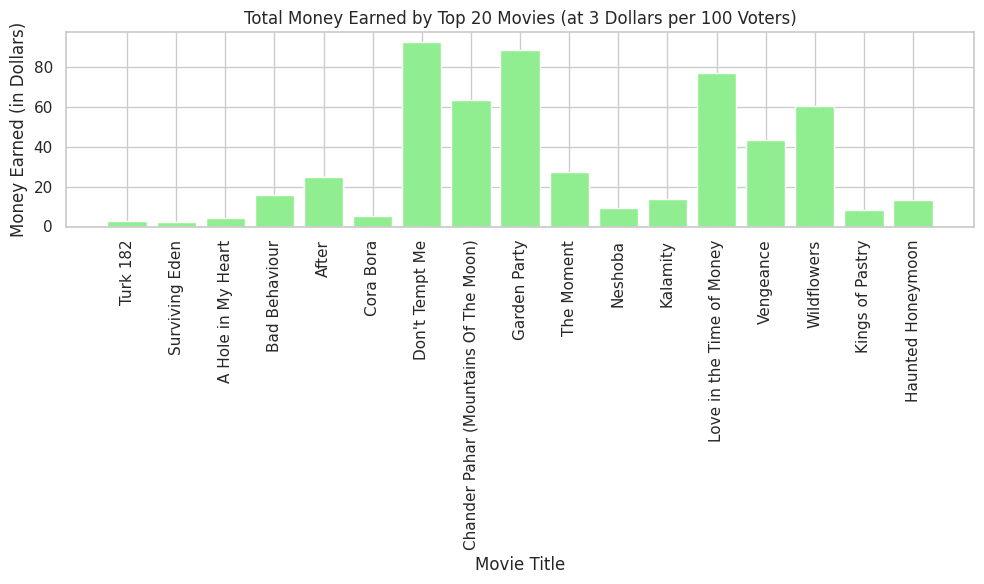

Total money earned by top 20 movies: 628.2 dollars


In [ ]:
# Sort the dataset by 'No of Persons Voted' column in descending order and take the top 20
top_20_movies = df.sort_values(by='Rating', ascending=False).head(20)

# Calculate earnings: (number of voters / 100) * 3 dollars
top_20_movies['money_earned_dollars'] = (top_20_movies['No of Persons Voted'] / 100) * 30

# Plot a bar graph (normal, not inverted)
plt.figure(figsize=(10, 6))
plt.bar(top_20_movies['Title'], top_20_movies['money_earned_dollars'], color='lightgreen')  # Adjust 'Title' to your actual column name

# Add labels and title
plt.xlabel('Movie Title')
plt.ylabel('Money Earned (in Dollars)')
plt.title('Total Money Earned by Top 20 Movies (at 3 Dollars per 100 Voters)')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

# Sum the total money earned by top 20 movies
total_money_earned_dollars = top_20_movies['money_earned_dollars'].sum()
print(f"Total money earned by top 20 movies: {total_money_earned_dollars} dollars")

In [ ]:
# Calculate budget based on 100 voters = 30 dollars
df['calculated_budget'] = (df['No of Persons Voted'] / 100) * 30

# Create a new DataFrame with movie titles and calculated budgets
budget_table = df[['Title', 'calculated_budget']]  # Adjust 'movie_title' to your actual column name

# Display the new budget table
print(budget_table)


                             Title  calculated_budget
0                   Dekalog (1988)               35.4
1                Three Colors: Red               72.3
2                   The Conformist               31.8
3                      Tokyo Story               44.1
4         The Leopard (re-release)               25.5
...                            ...                ...
16277  The Garbage Pail Kids Movie                6.3
16278            Death of a Nation               90.6
16279              United Passions               74.4
16280                     Bio-Dome              145.5
16282                Boogie Woogie                3.0

[12846 rows x 2 columns]


In [ ]:
print(df.columns)


Index(['Title', 'Release Date', 'Description', 'Rating', 'No of Persons Voted',
       'Directed by', 'Written by', 'Duration', 'Genres', 'Year'],
      dtype='object')


In [ ]:
# Filter for movies containing 'crime' in the genres and released between 1990 and 2014
crime_movies = df[
    (df['Genres'].str.contains('crime', case=False, na=False)) &  # Adjust 'genres' to your actual column name
    (df['Year'] >= 1990) &
    (df['Year'] <= 2014)  # Adjust 'Year' to your actual column name
]

# Normalize ratings for color mapping
norm = plt.Normalize(crime_movies['Rating'].min(), crime_movies['Rating'].max())
colors = plt.cm.RdYlGn(norm(crime_movies['Rating']))  # Red to Green colormap

# Create a scatter plot with Ratings on the x-axis and Year on the y-axis
plt.figure(figsize=(12, 6))
plt.scatter(crime_movies['Rating'], crime_movies['Year'],
            color=colors, alpha=0.6)

# Highlight the most deceiving movies (red points)
deceiving_movies = crime_movies[crime_movies['Rating'] == crime_movies['Rating'].min()]

# Add a phrase indicating red represents deceiving movies
plt.text(0.1, 2010, 'Red represents the most deceiving movies.', fontsize=12, color='red')

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Year')
plt.title('Scatter Plot of Crime Movies (1990-2014) with Bad Effect')

# Show color bar for reference
sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=norm)
sm.set_array([])  # Only needed for older versions of matplotlib
plt.colorbar(sm, label='Rating')

# Print names of five most deceiving movies
print("Most deceiving movies (low ratings):")
print(deceiving_movies['Tsitle'].head(5).to_string(index=False))  # Adjust 'movie_title' to your actual column name

# Show the plot
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined